In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'alt_roll_mod2_dust_sdf_0.20_v1.4_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [9]:
bundleList = []
for year in [2,3,4]:
    sql = 'filter="r" and night > %f and night < %f' % (365*year, 365*(year+1))
    metric = metrics.CountMetric(col='observationId')
    slicer = slicers.HealpixSlicer()
    plotDict = {'colorMax': 50}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night > 730.000000 and night < 1095.000000 for columns ['fieldDec', 'fieldRA', 'observationId']
Found 47162 visits
Running:  ['opsim_Count_observationId_r_and_night_gt_730_000000_and_night_lt_1095_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter="r" and night > 1460.000000 and night < 1825.000000 for columns ['fieldDec', 'fieldRA', 'observationId']
Found 48726 visits
Running:  ['opsim_Count_observationId_r_and_night_gt_1460_000000_and_night_lt_1825_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter="r" and night > 1095.000000 and night < 1460.000000 for columns ['fieldDec', 'fieldRA', 'observationId']
Found 48882 visits
Running:  ['opsim_Count_observationId_r_and_night_gt_1095_000000_and_night_lt_146

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 3286 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 13.349  dipole: lon: 109.054, lat: -35.7668, amp: 7.01175
Plotting complete.
Plotting figures with "filter="r" and night > 1460.000000 and night < 1825.000000" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1360 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 13.0885  dipole: lon: 74.8581, lat: -59.2459, amp: 8.54992
Plotting complete.
Plotting figures with "filter="r" and night > 1095.000000 and night < 1460.000000" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1495 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 13.837  dipole: lon: 51.5389, lat: -78.9116, amp: 4.47022
Plotting complete.


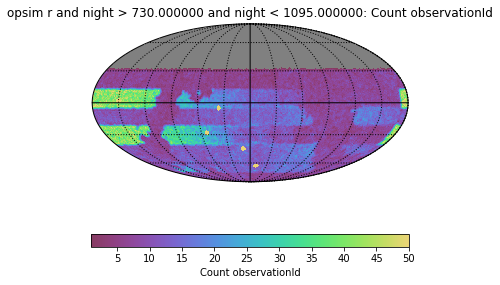

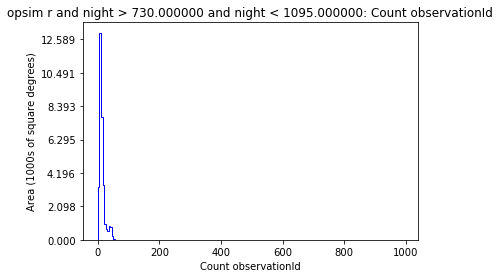

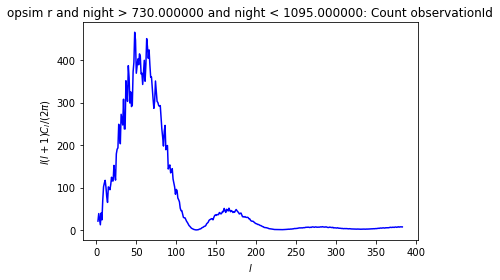

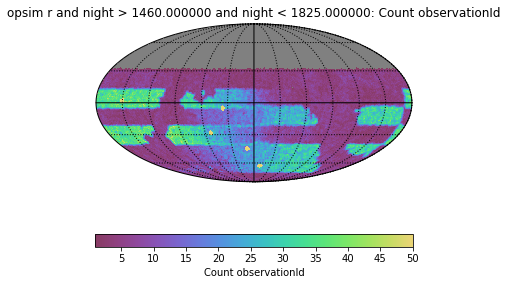

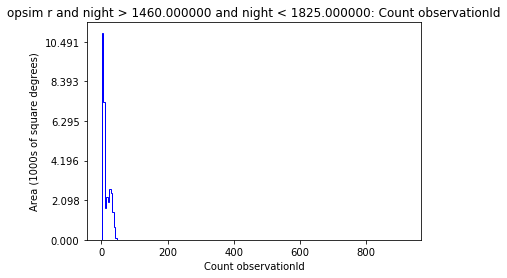

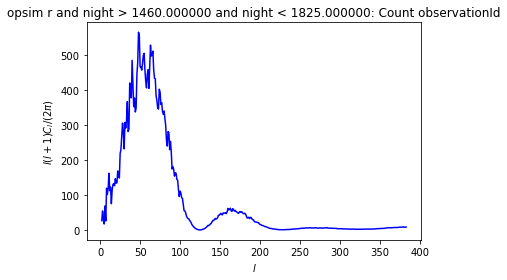

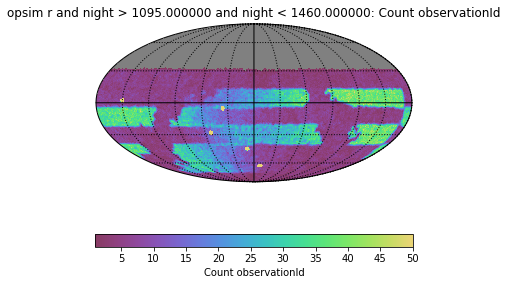

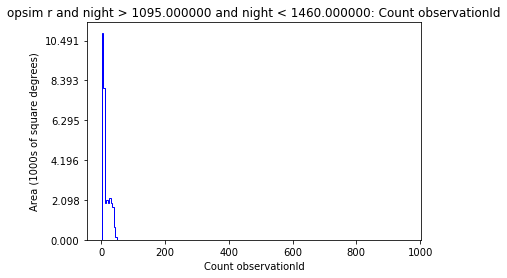

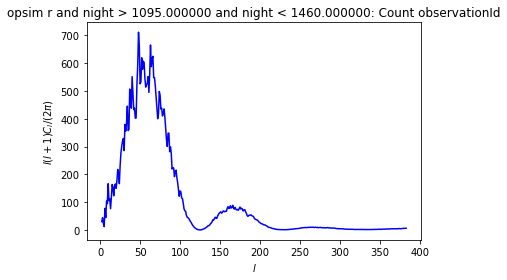

In [10]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)